## Autoencoder (CreditCard)

In [2]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [3]:
dataset= pd.read_csv("creditcard.csv")
dataset

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
284802 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
284803  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
284804  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
284805  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
284806 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
284802  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
284803  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
284804 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
284805 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
284806  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
284802      0  
284803      0  
284804      0  
284805      0  
284806      0  

[284807 rows x 31 columns]

In [7]:
x= StandardScaler().fit_transform(dataset.drop('Class', axis=1))
y= dataset['Class']

In [9]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [12]:
input_dim, encoding_dim= x_train.shape[1], 16
encoder= Sequential([
    InputLayer(input_shape=(input_dim,)),
    Dense(32, activation='relu'),
    Dense(encoding_dim, activation='relu')
])

decoder= Sequential([
    InputLayer(input_shape=(encoding_dim,)),
    Dense(32, activation='relu'),
    Dense(input_dim, activation='sigmoid')
])


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [13]:
autoencoder= Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(x_train, x_train, epochs=10, batch_size=32, shuffle=True, validation_data=(x_test, x_test))
autoencoder.summary()

Epoch 1/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - loss: 0.8352 - val_loss: 0.7243
Epoch 2/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.7338 - val_loss: 0.7144
Epoch 3/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 0.7284 - val_loss: 0.7105
Epoch 4/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.7256 - val_loss: 0.7076
Epoch 5/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.7164 - val_loss: 0.7052
Epoch 6/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.7099 - val_loss: 0.7040
Epoch 7/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 0.7226 - val_loss: 0.7044
Epoch 8/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.7179 - val_loss: 0.7046
Epoch 9/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 0.7238 - val_loss: 0.7025
Epoch 10/10
7121/7121 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.7128 - val_loss: 0.7028


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 16)                  │           1,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 30)                  │           1,534 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,164 (35.80 KB)

 Trainable params: 3,054 (11.93 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,110 (23.87 KB)

In [14]:
predictions= autoencoder.predict(x_test)
mse=np.mean(np.power(x_test - predictions, 2), axis=1)
threshold= np.percentile(mse, 99)

anomalies= np.where(mse>threshold, 1, 0)
print("Anomalies: ", np.sum(anomalies))

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Anomalies:  570


In [19]:
print("Accuracy: ", accuracy_score(y_test, anomalies))
print("Confusion Matrix:\n ", confusion_matrix(y_test, anomalies))
print("Classification Report:\n ", classification_report(y_test, anomalies))

Accuracy:  0.9903444401530845
Confusion Matrix:
  [[56353   511]
 [   39    59]]
Classification Report:
                precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.10      0.60      0.18        98

    accuracy                           0.99     56962
   macro avg       0.55      0.80      0.59     56962
weighted avg       1.00      0.99      0.99     56962



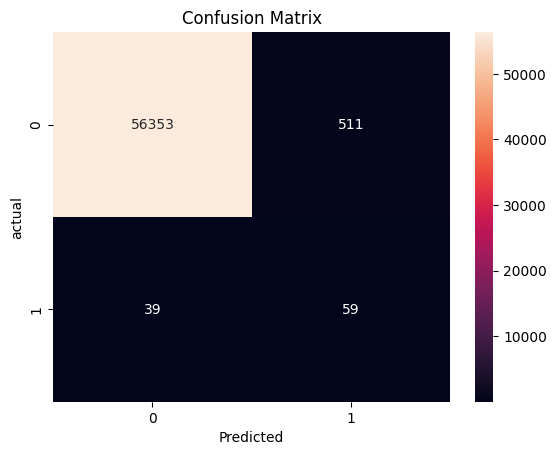

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, anomalies), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("actual")
plt.title("Confusion Matrix")
plt.show()